In [8]:
import numpy as np
import pandas as pd

# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle

import warnings
warnings.filterwarnings('ignore')

In [9]:
# import the data
test = pd.read_csv('df-test_set.csv')
train = pd.read_csv('df-train_set.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df-test_set.csv'

In [7]:
train.head()

NameError: name 'train' is not defined

In [8]:
train.info()

NameError: name 'train' is not defined

In [12]:
# missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(train)

NameError: name 'train' is not defined

In [58]:
missing_df = missing_values_table(train);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.
We will remove 0 columns.


In [32]:
# Drop the columns
train = train.drop(columns = list(missing_columns))

In [59]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [79]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


<AxesSubplot:xlabel='Sales_Total', ylabel='Density'>

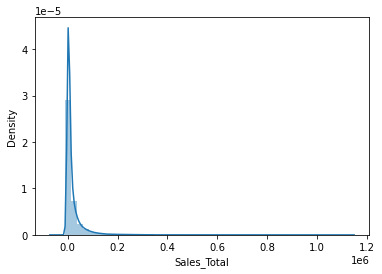

In [84]:
# target distribution
sns.distplot(train['Sales_Total'],kde=True)

In [66]:
df.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [7]:
df.skew()

NameError: name 'df' is not defined

In [76]:
df.kurtosis()

Index             -1.200000
Weight_Kg         13.611804
Low_Price         20.126362
High_Price        17.610473
Sales_Total       19.626133
Total_Qty_Sold    19.531658
Total_Kg_Sold     24.423404
Stock_On_Hand     14.868371
dtype: float64

In [ ]:
# dummy variable encoding

dummy_df = pd.get_dummies(train)
dummy_df.head()

In [81]:
# Correlation and Variable Selection
column_titles = [col for col in dummy_df.columns if col!= 'Sales_Total'] + ['Sales_Total']
dummy_df=dummy_df.reindex(columns=column_titles)

In [ ]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['SalePrice']).rename(columns = {'Sales_Total':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

In [89]:
# correlation matrix
# find rows and columnd where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()

r, c = np.where(np.abs(corrs) > 0.9)

off_diagonal = np.where(r != c)

# correlation matrix rows and columns where we have highly correlated off diagonal entries:
corrs.iloc[r[off_diagonal], c[off_diagonal]]


""


In [90]:
missing_values_table(dummy_df)

Your selected dataframe has 647 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [95]:
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,Province_EASTERN FREESTATE,...,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03,Sales_Total
0,12.0,108.0,112.0,29,348.0,0,9.30,1,0,0,...,0,0,0,0,0,0,0,0,0,3236.0
1,18.3,150.0,170.0,332,6075.6,822,8.51,1,0,0,...,1,0,0,0,0,0,0,0,0,51710.0
2,20.0,70.0,80.0,66,1320.0,50,3.68,0,0,0,...,0,0,0,0,0,0,0,0,0,4860.0
3,9.0,60.0,60.0,10,90.0,0,6.67,0,0,0,...,0,0,0,0,0,0,0,0,0,600.0
4,10.0,40.0,45.0,927,9270.0,393,4.48,0,0,0,...,0,0,0,0,0,0,0,0,0,41530.0


In [92]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [100]:
# Model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = train['Sales_Total']
y.shape

(64376,)

In [101]:
# fit the model to the data and make predictions - Total_Kg_Sold
X = train['Total_Kg_Sold'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 17488.820932968025,
 'Train R^2': 0.8434504457145557,
 'Test RMSE': 16910.37087453754,
 'Test R^2': 0.8605899984782706}

In [105]:
# fit the model to the data and make predictions - Stock_On_Hand
X = train['Stock_On_Hand'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 42570.180673373914,
 'Train R^2': 0.07244053775341852,
 'Test RMSE': 43869.56777769357,
 'Test R^2': 0.0617590630991629}

In [106]:
train.shape,test.shape

((64376, 13), (685, 13))

In [113]:
X_real = pd.get_dummies(test)
X_real.head()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-03,Date_2020-09-07,Date_2020-09-09,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,1,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,12.0,120.0,120.0,720.0,6,72.0,45,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,18.3,160.0,160.0,160.0,1,18.3,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
missing_values_table(X_real)

Your selected dataframe has 181 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [1]:
# submission dataframe
submission = pd.DataFrame(
    {'Index':Total_Kg_Sold ,
     'avg_price_per_kg': preds
    })

NameError: name 'pd' is not defined

In [ ]:
submission.head()

In [ ]:
submission.to_csv("full set.csv", index=False)